In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [3]:
blue_wins_0 = df[df['blueWins'] == 0]
blue_wins_1 = df[df['blueWins'] == 1]

red_wins_0 = df[df['blueWins'] == 1]
red_wins_1 = df[df['blueWins'] == 0]

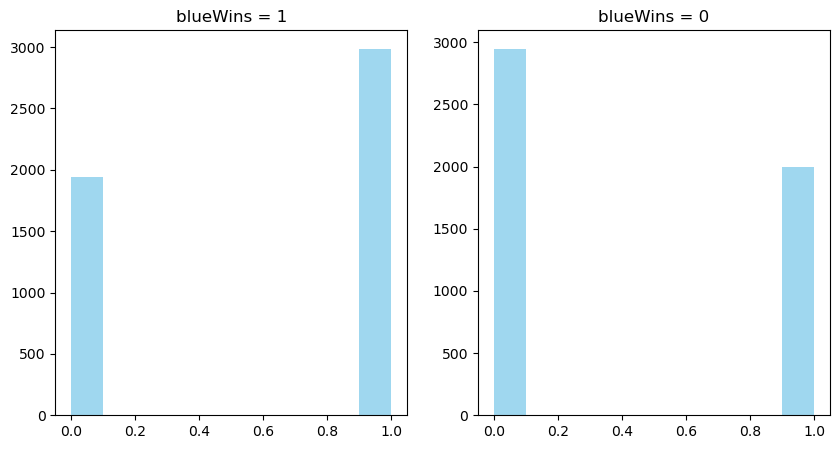

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(blue_wins_1['blueFirstBlood'], color='skyblue',alpha=0.8)
axs[0].set_title('blueWins = 1')

axs[1].hist(blue_wins_0['blueFirstBlood'], color='skyblue',alpha=0.8)
axs[1].set_title('blueWins = 0')

plt.show()

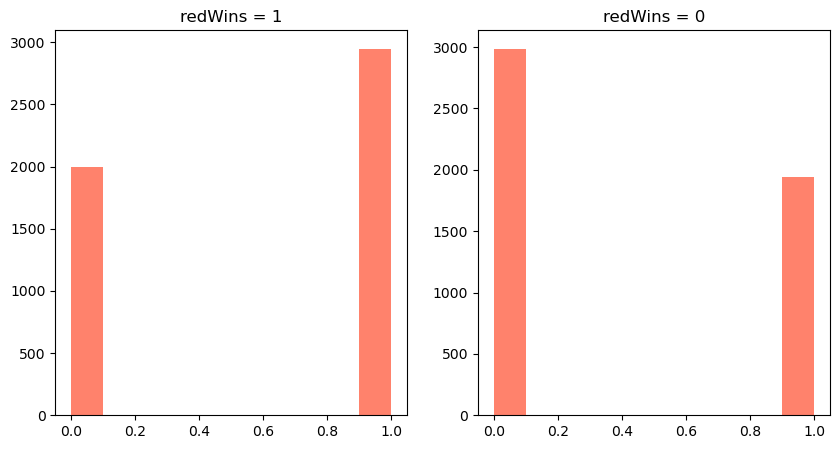

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(red_wins_1['redFirstBlood'], color='tomato',alpha=0.8)
axs[0].set_title('redWins = 1')

axs[1].hist(red_wins_0['redFirstBlood'], color='tomato',alpha=0.8)
axs[1].set_title('redWins = 0')

plt.show()

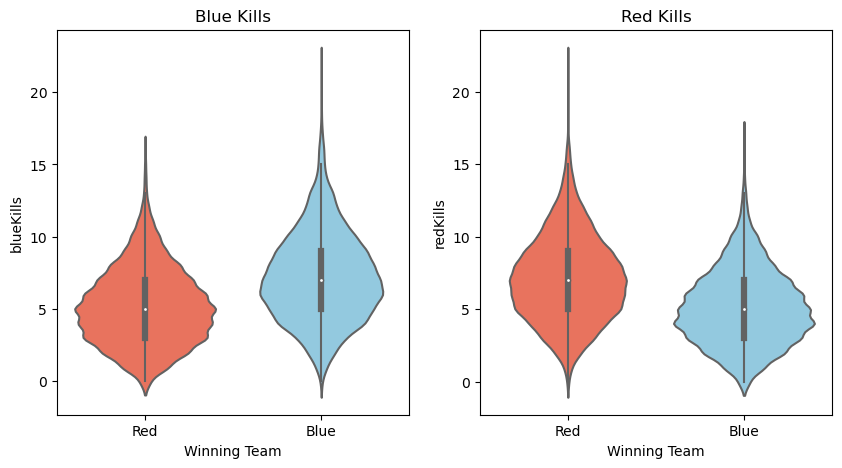

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(x='blueWins', y='blueKills', data=df, palette=['tomato','skyblue'], ax=axs[0])
axs[0].set_title('Blue Kills')

sns.violinplot(x='blueWins', y='redKills', data=df, palette=['tomato','skyblue'], ax=axs[1])
axs[1].set_title('Red Kills')

axs[0].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])
axs[1].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])

plt.show()

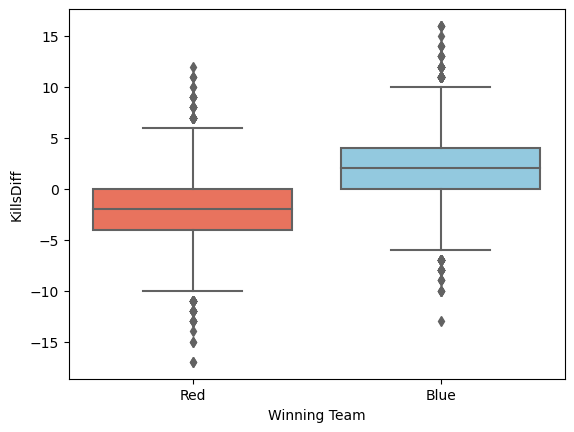

In [7]:
df['KillsDiff'] = df['blueKills'] - df['redKills']
sns.boxplot(x='blueWins', y='KillsDiff', data=df, palette=['tomato','skyblue'])

plt.xlabel('Winning Team')
plt.xticks([0, 1], ['Red', 'Blue'])

plt.show()

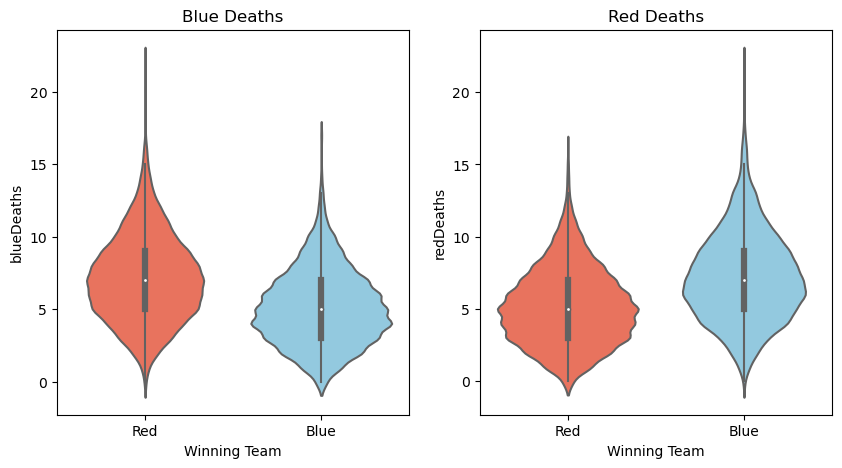

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(x='blueWins', y='blueDeaths', data=df, palette=['tomato','skyblue'], ax=axs[0])
axs[0].set_title('Blue Deaths')

sns.violinplot(x='blueWins', y='redDeaths', data=df, palette=['tomato','skyblue'], ax=axs[1])
axs[1].set_title('Red Deaths')

axs[0].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])
axs[1].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])

plt.show()

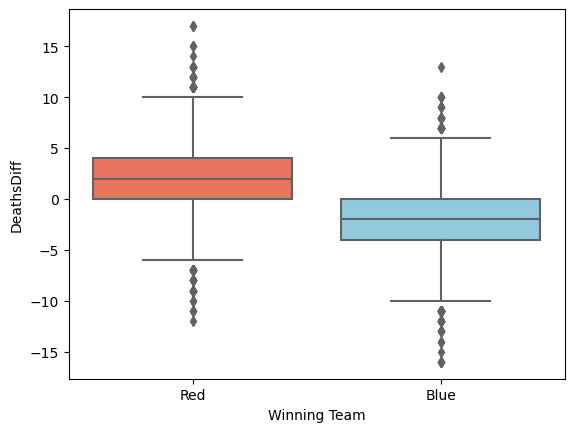

In [9]:
df['DeathsDiff'] = df['blueDeaths'] - df['redDeaths']
sns.boxplot(x='blueWins', y='DeathsDiff', data=df, palette=['tomato','skyblue'])

plt.xlabel('Winning Team')
plt.xticks([0, 1], ['Red', 'Blue'])

plt.show()

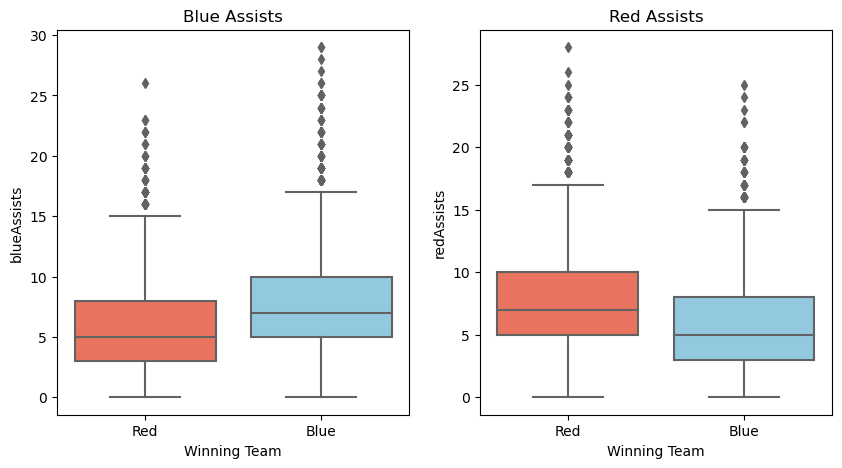

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x='blueWins', y='blueAssists', data=df, palette=['tomato','skyblue'], ax=axs[0])
axs[0].set_title('Blue Assists')

sns.boxplot(x='blueWins', y='redAssists', data=df, palette=['tomato','skyblue'], ax=axs[1])
axs[1].set_title('Red Assists')

axs[0].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])
axs[1].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])

plt.show()

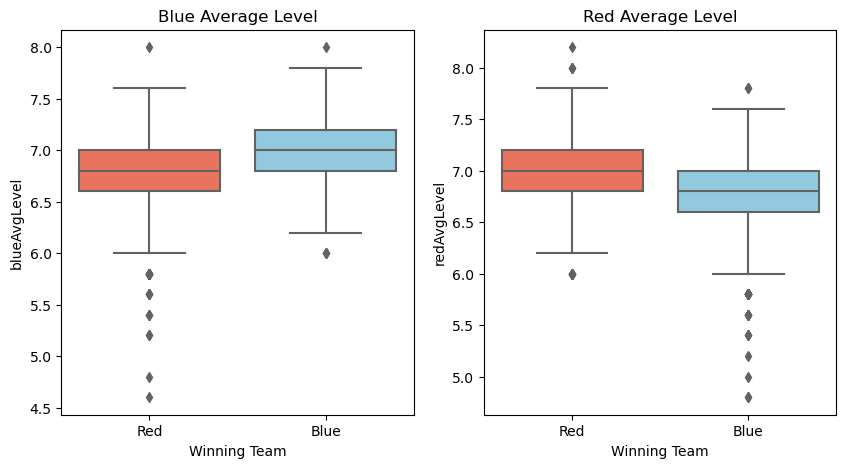

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x='blueWins', y='blueAvgLevel', data=df, palette=['tomato','skyblue'], ax=axs[0])
axs[0].set_title('Blue Average Level')

sns.boxplot(x='blueWins', y='redAvgLevel', data=df, palette=['tomato','skyblue'], ax=axs[1])
axs[1].set_title('Red Average Level')

axs[0].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])
axs[1].set(xlabel='Winning Team', xticklabels=['Red', 'Blue'])

plt.show()

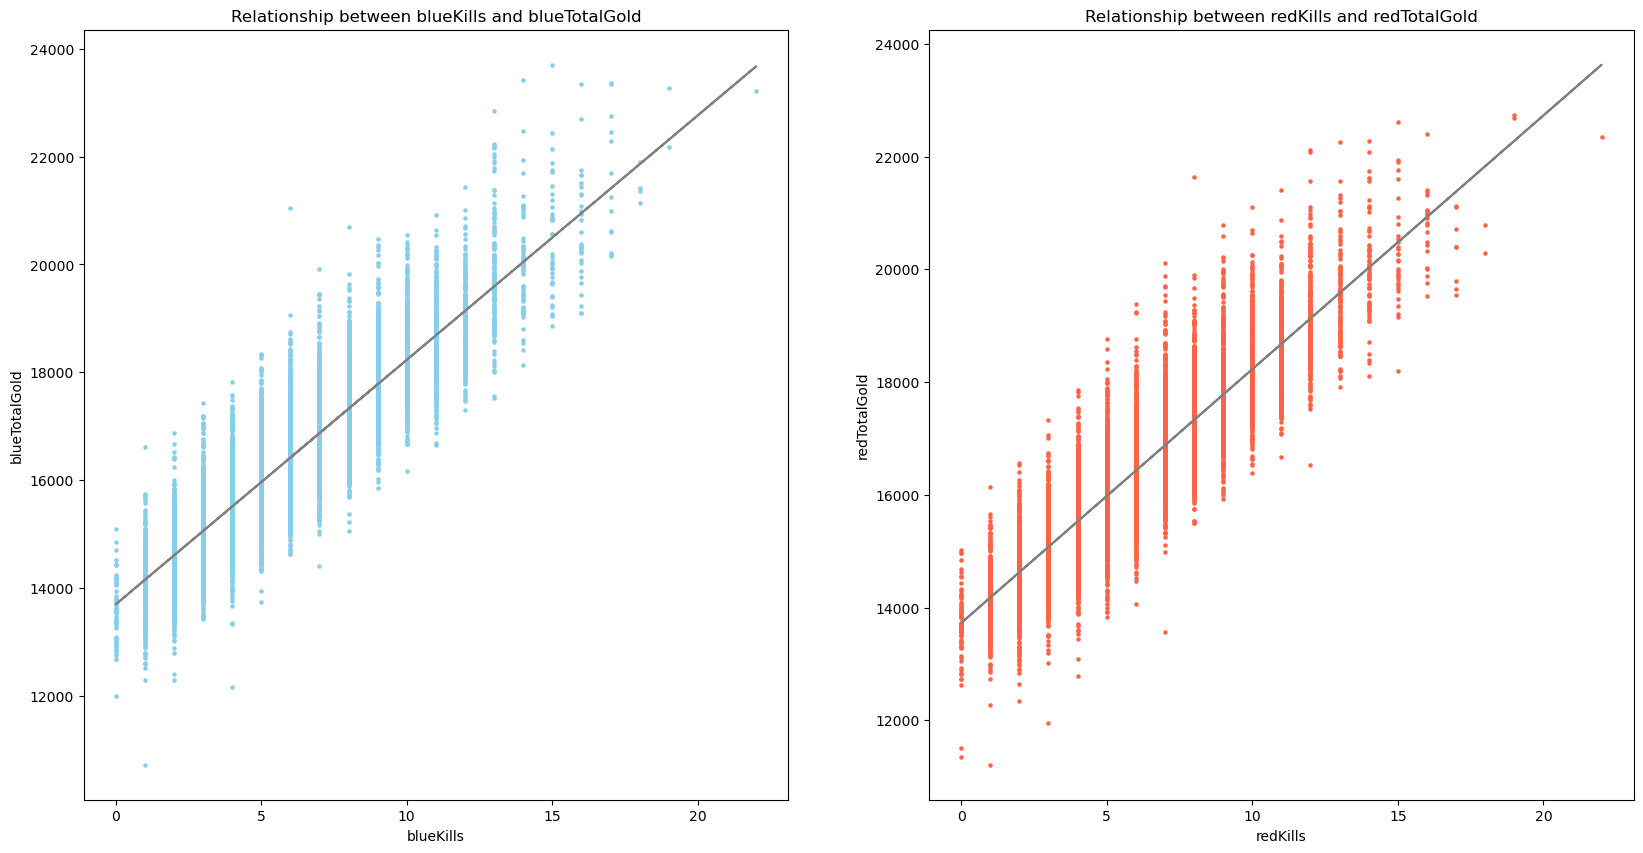

In [12]:
X_blue = df['blueKills'].values.reshape(-1, 1)
Y_blue = df['blueTotalGold'].values.reshape(-1, 1)

X_red = df['redKills'].values.reshape(-1, 1)
Y_red = df['redTotalGold'].values.reshape(-1, 1)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(X_blue, Y_blue, color="skyblue", s=5)
axs[0].set_title('Relationship between blueKills and blueTotalGold')
axs[0].set_xlabel('blueKills')
axs[0].set_ylabel('blueTotalGold')

axs[1].scatter(X_red, Y_red, color="tomato", s=5)
axs[1].set_title('Relationship between redKills and redTotalGold')
axs[1].set_xlabel('redKills')
axs[1].set_ylabel('redTotalGold')

from sklearn.linear_model import LinearRegression

axs[0].plot(X_blue, LinearRegression().fit(X_blue, Y_blue).predict(X_blue), color='gray')
axs[1].plot(X_red, LinearRegression().fit(X_red, Y_red).predict(X_red), color='gray')

plt.show()

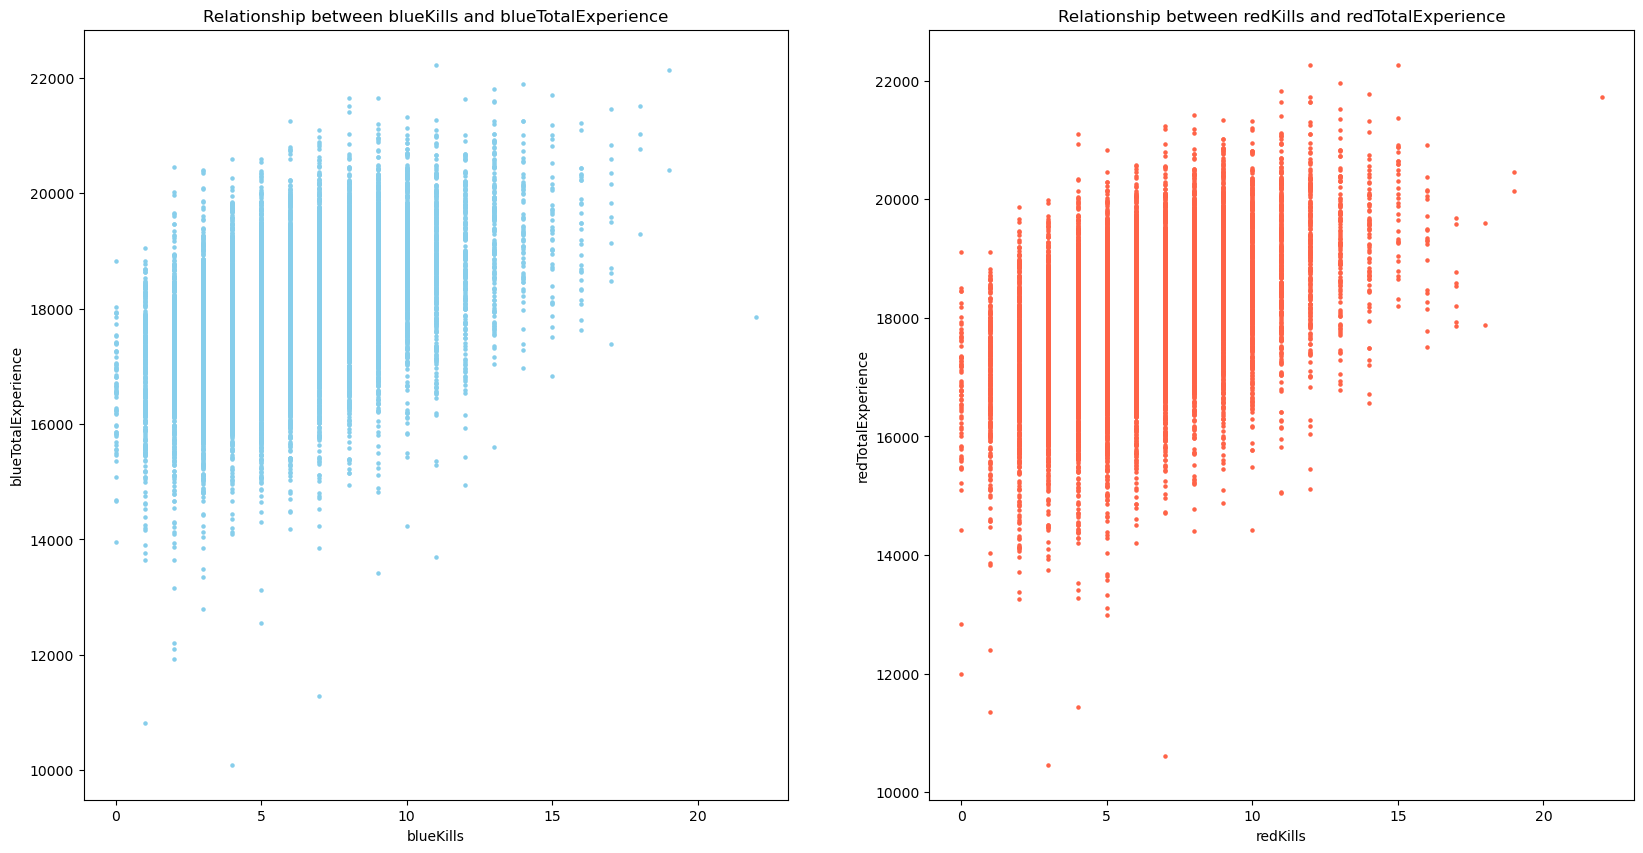

In [13]:
X_blue = df['blueKills'].values.reshape(-1, 1)
Y_blue = df['blueTotalExperience'].values.reshape(-1, 1)

X_red = df['redKills'].values.reshape(-1, 1)
Y_red = df['redTotalExperience'].values.reshape(-1, 1)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(X_blue, Y_blue, color="skyblue", s=5)
axs[0].set_title('Relationship between blueKills and blueTotalExperience')
axs[0].set_xlabel('blueKills')
axs[0].set_ylabel('blueTotalExperience')


axs[1].scatter(X_red, Y_red, color="tomato", s=5)
axs[1].set_title('Relationship between redKills and redTotalExperience')
axs[1].set_xlabel('redKills')
axs[1].set_ylabel('redTotalExperience')


plt.show()

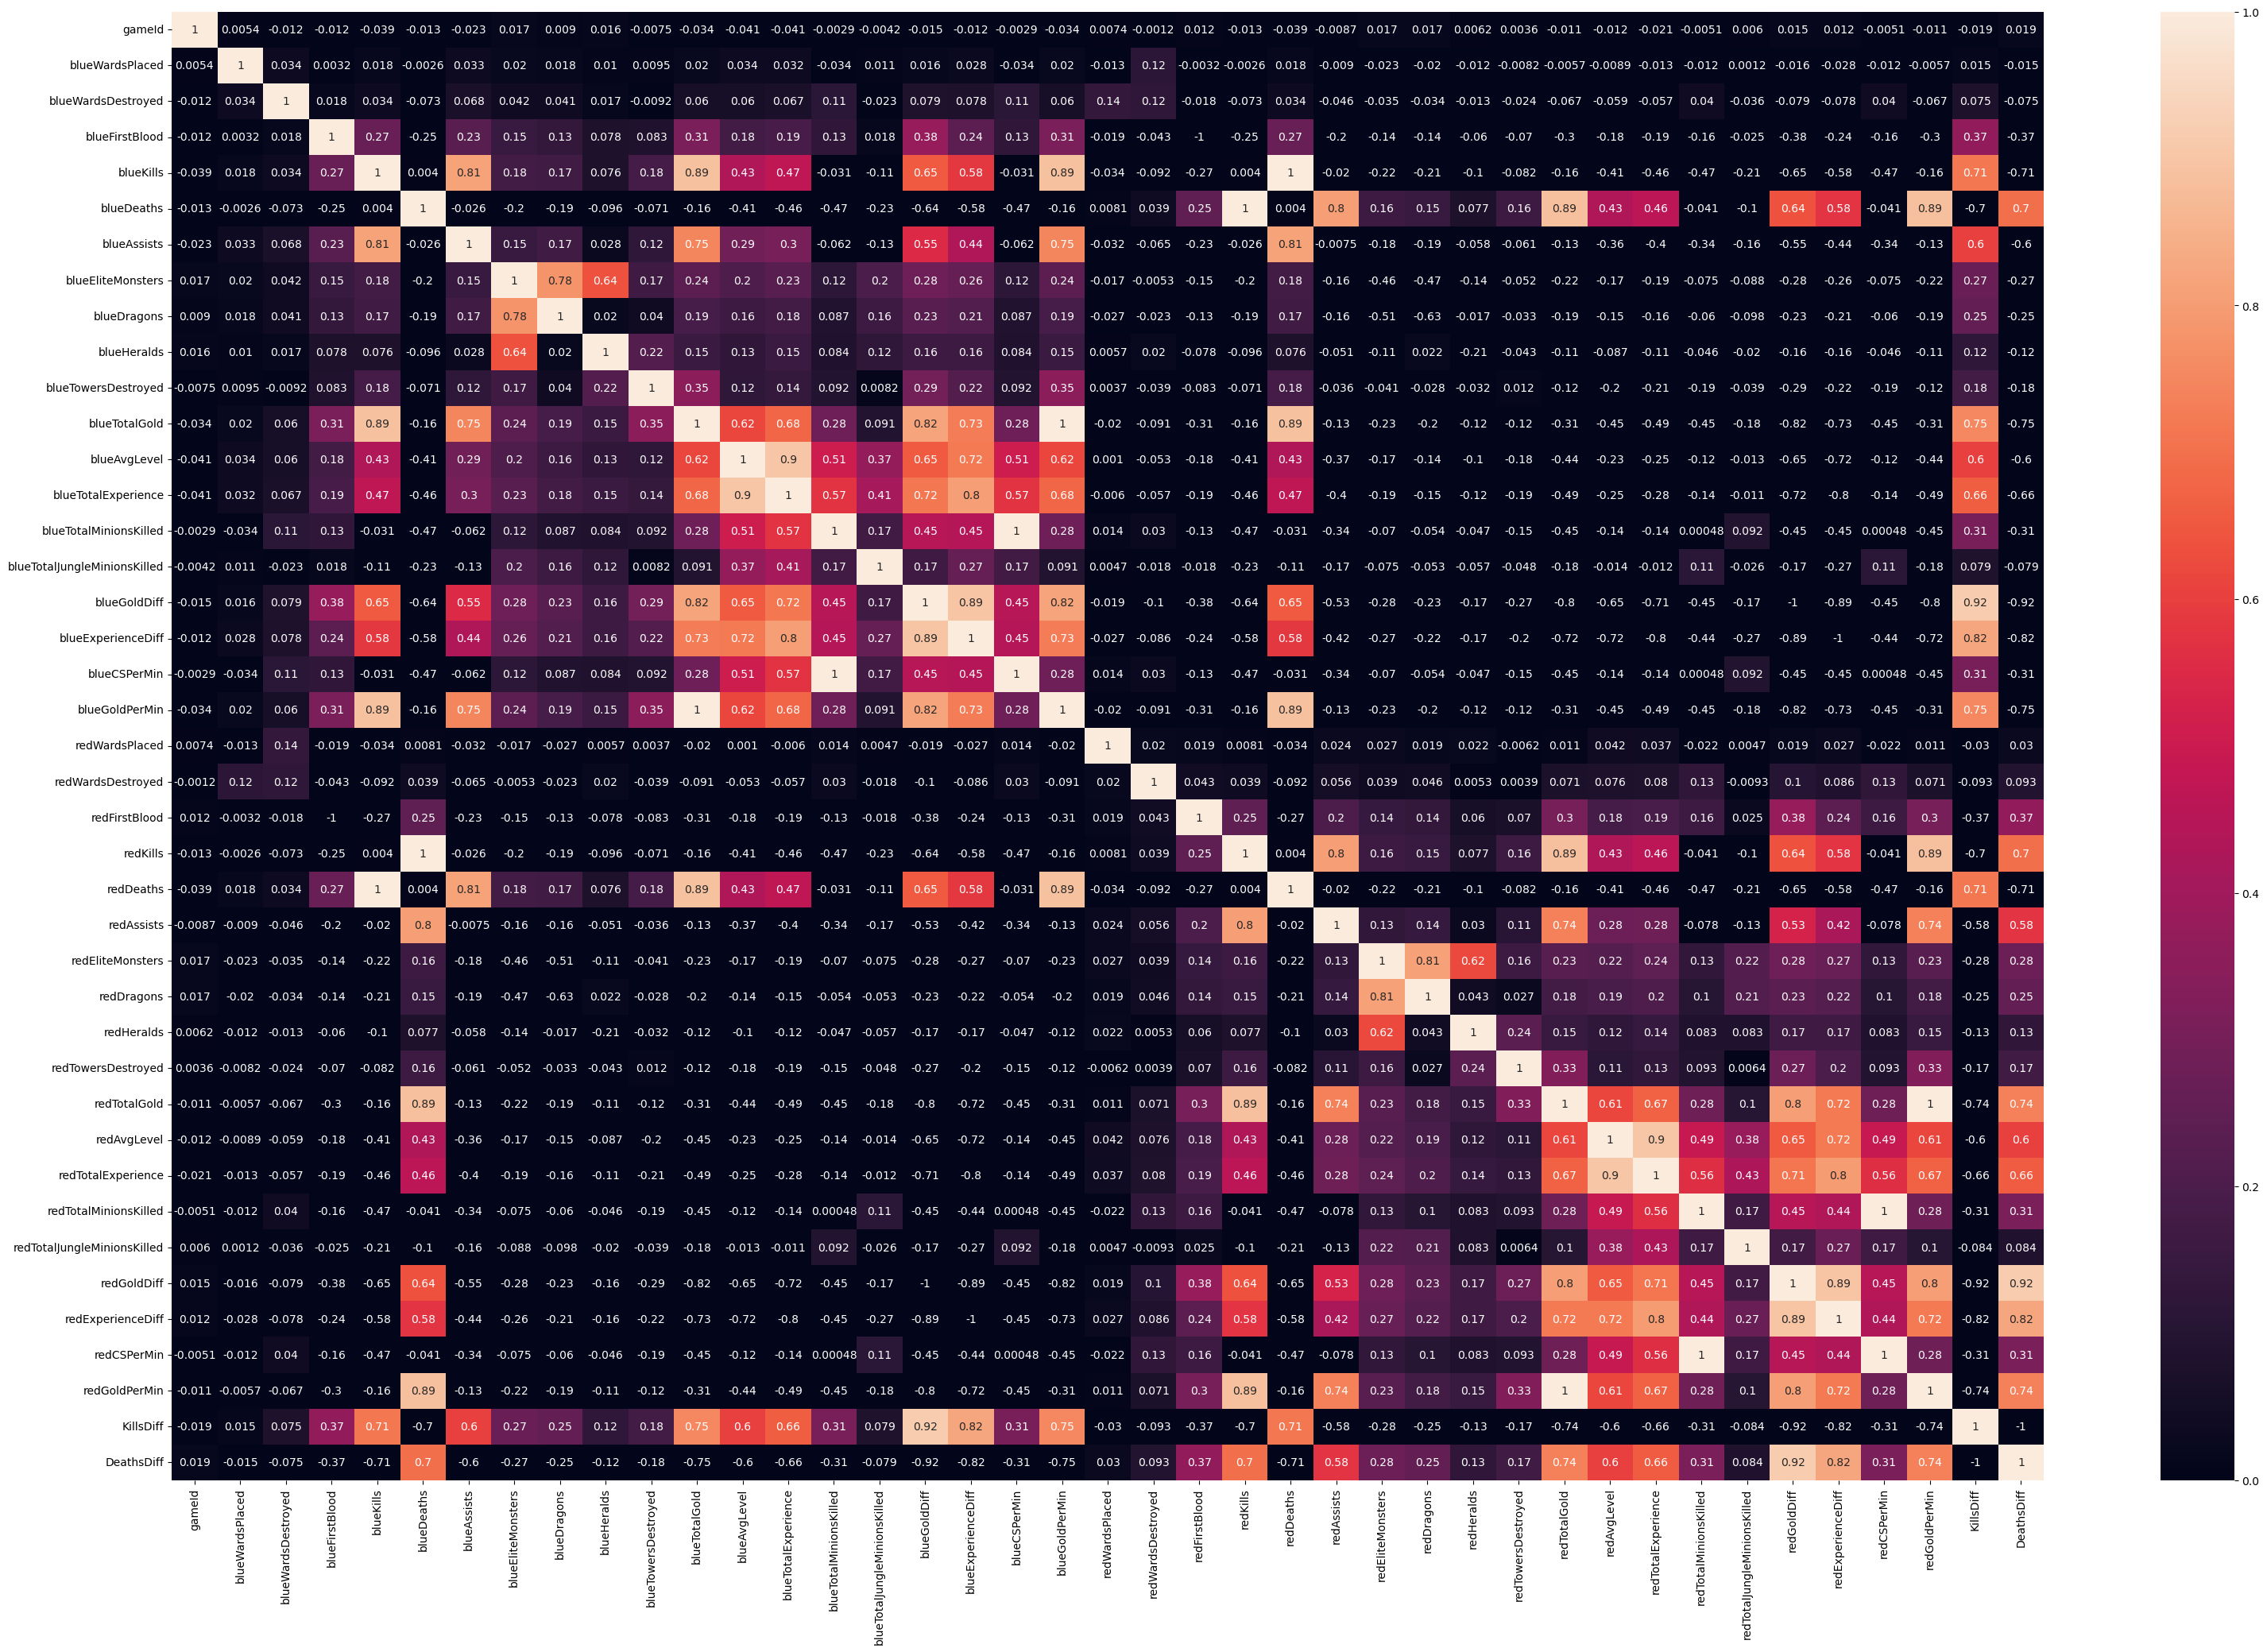

In [14]:
plt.figure(figsize=(38,24))
sns.heatmap(df.drop('blueWins', axis=1).corr(), annot=True, vmin=0)
plt.show()

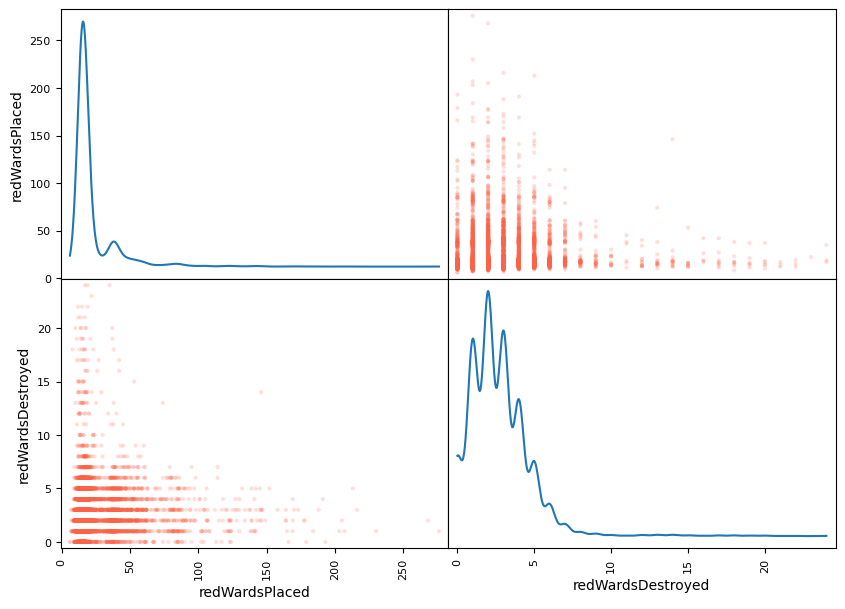

In [15]:
columns = ['redWardsPlaced', 'redWardsDestroyed']
pd.plotting.scatter_matrix(df[columns], alpha=.2, figsize=(10,7), diagonal='kde', 
                           c='tomato', hist_kwds={'color':['tomato']})
plt.show()

In [16]:
print(f"More than 130 wards placed: {len(df[df['redWardsPlaced'] >= 130])} games")
print(f"More than 18 wards destroyed: {len(df[df['redWardsDestroyed'] >= 18])} games")

More than 130 wards placed: 56 games
More than 18 wards destroyed: 30 games


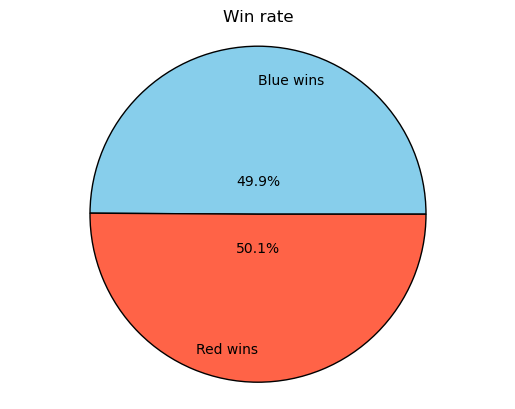

In [17]:
labels = ['Blue wins', 'Red wins']
sizes = [df.blueWins[df['blueWins'] == 1].count(), df.blueWins[df['blueWins'] == 0].count()]
explode = [0.1, 0]

plt.pie(sizes, labels=labels, colors=['skyblue', 'tomato'], 
        autopct='%1.1f%%', pctdistance=0.2, wedgeprops={'edgecolor': 'black'},labeldistance=0.8)

plt.title("Win rate")
plt.axis('equal')
plt.show()